# 課題

1. $P(s)$の安定性を判定せよ．
2. 講義資料5-4の図1の比例制御を施したときのフィードバック制御系の伝達関数$G(s)$を求めよ．
3. フルビッツ法かラウス法を使って，フィードバック制御系が安定となるためのKの条件を求めよ．（過程全てを書かなくてよいが，$H_2$,$H_3$の式や，ラウス数列の1列目は書くように．）
4. Python-controlを使って$K$が安定条件を満たす場合と満たさない場合それぞれのステップ応答を調べ，求めた条件が正しいことを確かめよ（条件の境界ピッタリじゃない方が良い）

### (1) $P(s)$の安定性を判定せよ．

安定性の必要条件である「伝達関数の特性多項式の係数が全て正である」を満たしていないため，不安定である．

### (2) 講義資料5-4の図1の比例制御を施したときのフィードバック制御系の伝達関数$G(s)$を求めよ．

$G(s) = \displaystyle\frac{K \cdot P(s)}{1 + K \cdot P(s)} = \frac{K(s - 1)}{s^4 + s^3 + 2s^2 + (K-2)s + (4 - K)}$

### (3) フルビッツ法かラウス法を使って，フィードバック制御系が安定となるためのKの条件を求めよ．（過程全てを書かなくてよいが，$H_2$,$H_3$の式や，ラウス数列の1列目は書くように．）

伝達関数$G(s)$の特性多項式$D(s)$は$s^4 + s^3 + 2s^2 + (K-2)s + (4 - K)$である．

今回はフルビッツ法を使ってKの条件を求める．

フルビッツ行列$H$は以下のようになる．

$H=\begin{pmatrix}
1 & K-2 & 0 & 0 \\ 1 & 2 & 4-K & 0 \\ 0 & 1 & K-2 & 0 \\ 0 & 1 & 2 & 4-K
\end{pmatrix}$

フルビッツ小行列$H_1，H_2，H_3$は以下のようになる．

$H_1=1$

$H_2=\begin{vmatrix}
1 & K-2 \\ 1 & 2
\end{vmatrix}
=4-K$

$H_3=\begin{vmatrix}
1 & K-2 & 0 \\ 1 & 2 & 4-K \\ 0 & 1 & K-2
\end{vmatrix}
=-K^2+7K-12$

$H_2 > 0$かつ$H_3 > 0$となる条件は

$3 < K < 4$

### (4) Python-controlを使って$K$が安定条件を満たす場合と満たさない場合それぞれのステップ応答を調べ，求めた条件が正しいことを確かめよ（条件の境界ピッタリじゃない方が良い）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
t = np.linspace(0, 100, 1000)

In [2]:
K1 = 2.9
K2 = 3.5
K3 = 4.1

n1 = [K1, -K1]
n2 = [K2, -K2]
n3 = [K3, -K3]

d1 = [1, 1, 2, K1-2, 4-K1]
d2 = [1, 1, 2, K2-2, 4-K2]
d3 = [1, 1, 2, K3-2, 4-K3]


P1 = tf(n1, d1)
P2 = tf(n2, d2)
P3 = tf(n3, d3)

In [3]:
y1, t = step(P1, t)
y2, t = step(P2, t)
y3, t = step(P3, t)

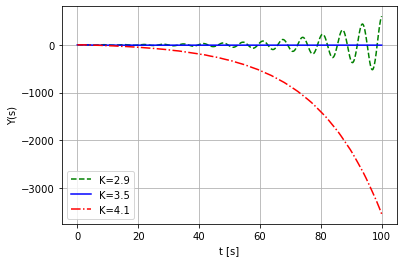

In [4]:
plt.plot(t, y1, label="K=2.9", color="green", linestyle="--")
plt.plot(t, y2, label="K=3.5", color="blue")
plt.plot(t, y3, label="K=4.1", color="red", linestyle="-.")
plt.xlabel("t [s]")
plt.ylabel("Y(s)")
plt.legend()
plt.grid()
plt.show()

グラフより，$3<K<4$のときシステムが安定し，範囲外では不安定になることがわかる．